# Previsão de Evasão de Clientes - Telecom X

## Importação de biblioteca e carregamento do dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [18]:
url = 'https://raw.githubusercontent.com/albvieiraa/previsao-churn-clientes-Telecom-X/refs/heads/main/telecomx_dataset.csv'
df = pd.read_csv(url)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.156476
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.969099
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.429323
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.221565
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.758054


## Exploração inicial e limpeza dos dados

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [4]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [6]:
df.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.128918
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.989153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.599934
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.166995
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.312623
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.953649
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.903682


In [21]:
# Remover coluna ID
df.drop(columns=['customerID'], inplace=True)

In [20]:
# Renomeando as colunas
df.rename(columns={
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'Tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges',
    'Daily_Charges': 'DailyCharges'
}, inplace=True)

In [22]:
df.columns

Index(['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'DailyCharges'],
      dtype='object')

In [23]:
# Loop for para saber cada valor único
for coluna in df.columns:
    print(f'{coluna}: {df[coluna].unique()}')

Churn: [0 1]
Gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
Tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
PhoneService: [1 0]
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
MonthlyCharges: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
TotalCharges: [ 593.3   

In [24]:
# Tratamento da coluna binária "gender"
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [25]:
# Removendo redundância

replace_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [27]:
# Tratando as outras binárias
binary_map = {'Yes': 1, 'No': 0}

binary_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in binary_cols:
    df[col] = df[col].map(binary_map)


In [28]:
one_hot_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [30]:
df = df.astype(int)

In [31]:
df.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,DailyCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,0,0,1,...,65,593,2,0,0,1,0,0,0,1
1,0,1,0,0,0,9,1,1,0,0,...,59,542,1,0,0,0,0,0,0,1
2,1,1,0,0,0,4,1,0,0,0,...,73,280,2,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,0,0,1,...,98,1237,3,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,0,0,0,...,83,267,2,1,0,0,0,0,0,1


### Normalização

In [32]:
# Normalizando as colunas numéricas contínuas
from sklearn.preprocessing import StandardScaler

# Seleciona só as colunas numéricas contínuas (não categóricas já codificadas)
numeric_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Verificando correlação

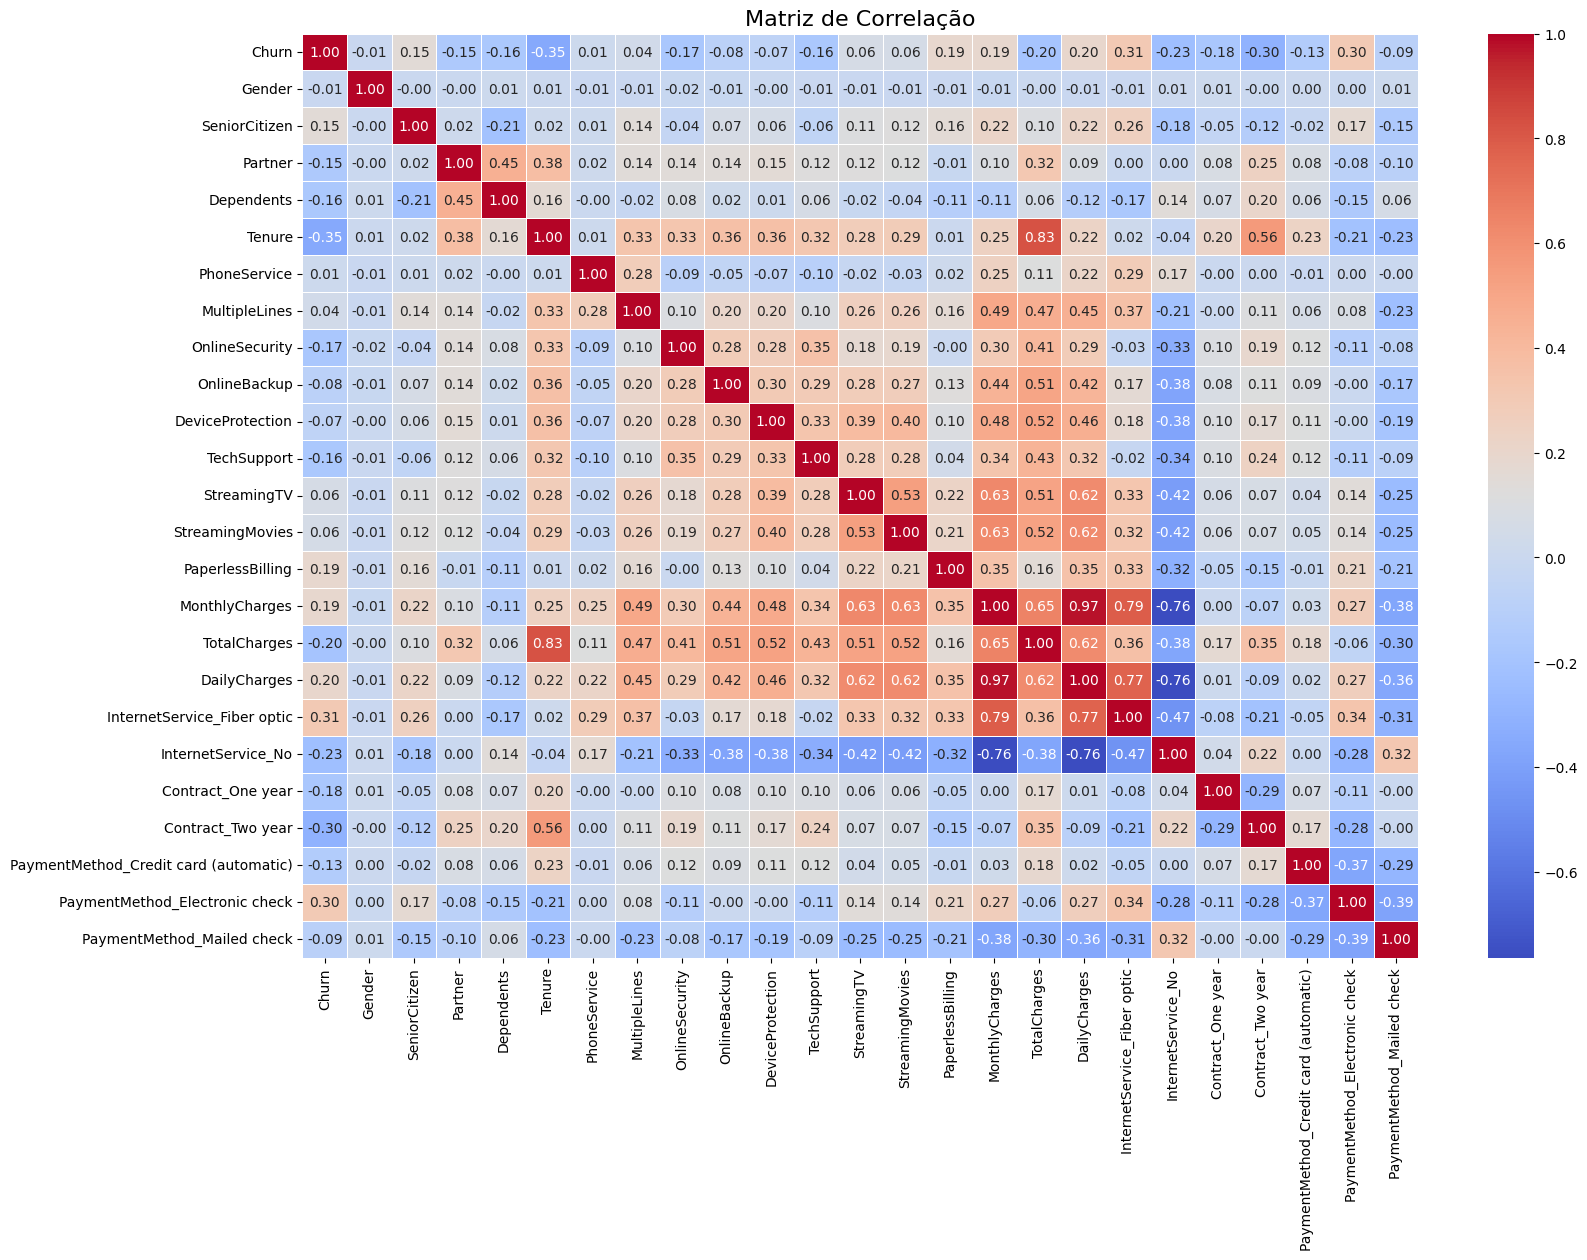

In [33]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

In [35]:
correlacoes = df.corr()['Churn'].sort_values(key=abs, ascending=False)
print(correlacoes)

Churn                                    1.000000
Tenure                                  -0.352229
InternetService_Fiber optic              0.308020
Contract_Two year                       -0.302253
PaymentMethod_Electronic check           0.301919
InternetService_No                      -0.227890
DailyCharges                             0.199225
TotalCharges                            -0.198326
MonthlyCharges                           0.193422
PaperlessBilling                         0.191825
Contract_One year                       -0.177820
OnlineSecurity                          -0.171226
TechSupport                             -0.164674
Dependents                              -0.164221
SeniorCitizen                            0.150889
Partner                                 -0.150448
PaymentMethod_Credit card (automatic)   -0.134302
PaymentMethod_Mailed check              -0.091683
OnlineBackup                            -0.082255
DeviceProtection                        -0.066160


## Separando as variáveis para os Modelos

In [37]:
X = df.drop(columns='Churn')
y = df['Churn']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Regressão Logistica

In [39]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Avaliando desempenho

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    print(f'📊 Avaliação do modelo: {nome_modelo}')
    print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))
    print('Precision:', round(precision_score(y_test, y_pred), 4))
    print('Recall:', round(recall_score(y_test, y_pred), 4))
    print('F1 Score:', round(f1_score(y_test, y_pred), 4))
    print('ROC AUC:', round(roc_auc_score(y_test, y_prob), 4))
    print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))
    print('---\n')

In [42]:
avaliar_modelo(modelo_lr, X_test, y_test, 'Regressão Logística')
avaliar_modelo(modelo_rf, X_test, y_test, 'Random Forest')

📊 Avaliação do modelo: Regressão Logística
Accuracy: 0.7935
Precision: 0.6352
Recall: 0.5214
F1 Score: 0.5727
ROC AUC: 0.8432
Matriz de Confusão:
 [[923 112]
 [179 195]]
---

📊 Avaliação do modelo: Random Forest
Accuracy: 0.7814
Precision: 0.6187
Recall: 0.4599
F1 Score: 0.5276
ROC AUC: 0.8129
Matriz de Confusão:
 [[929 106]
 [202 172]]
---



**Regressão Logística** teve desempenho superior em todas as métricas, especialmente em recall e AUC.

- Como o foco é prever churn, recall é muito importante: indica quantos clientes que realmente cancelam foram corretamente identificados pelo modelo.

- A precisão está razoável (~63%), mas poderia ser otimizada com ajuste de limiar (threshold).

- A AUC > 0.84 para regressão logística mostra que o modelo está separando bem as classes.

## Interpretar a importância das variáveis

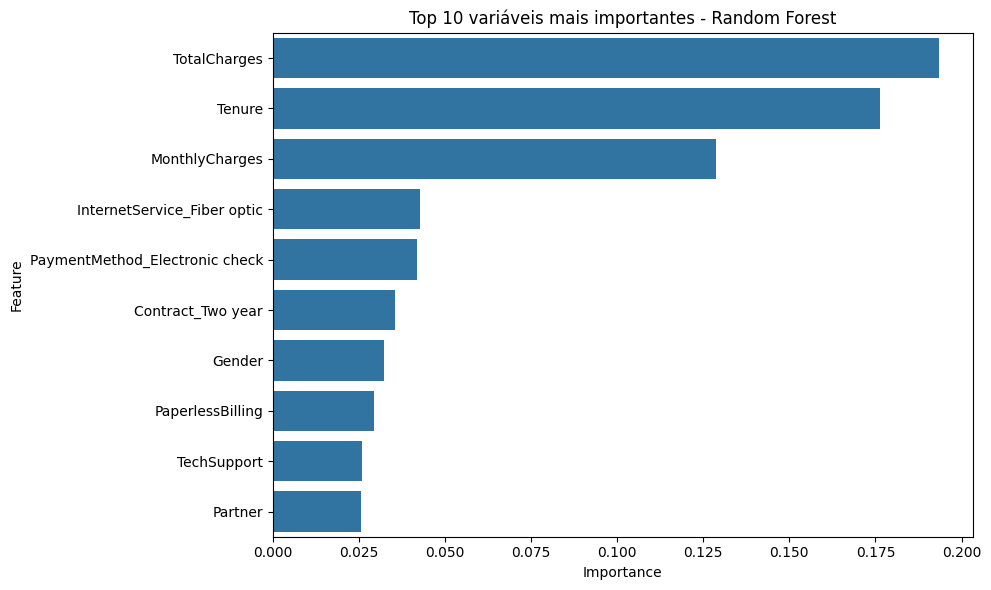

In [43]:
importancias = modelo_rf.feature_importances_
features = X.columns
df_importancia = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia.head(10), x='Importance', y='Feature')
plt.title('Top 10 variáveis mais importantes - Random Forest')
plt.tight_layout()
plt.show()


## Exportando o modelo

In [44]:
import joblib

# Salva o modelo treinado em um arquivo
joblib.dump(modelo_lr, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

# Conclusões

Resumo das métricas para cada modelo:

| Métrica       | Regressão Logística | Random Forest |
| ------------- | ------------------- | ------------- |
| **Accuracy**  | 79.35%              | 78.14%        |
| **Precision** | 63.52%              | 61.87%        |
| **Recall**    | **52.14%**          | 45.99%        |
| **F1 Score**  | 57.27%              | 52.76%        |
| **ROC AUC**   | **0.8432**          | 0.8129        |


A **regressão logística** se destacou com melhor desempenho em todas as métricas, especialmente no recall — crucial para este problema, pois permite identificar a maior parte dos clientes que estão em risco de sair.

💡 **Principais Fatores que Influenciam o Churn**

Baseando-se na importância das variáveis do Random Forest e nos coeficientes da Regressão Logística, os fatores mais relevantes foram:

- Contrato mensal: Clientes com contrato "month-to-month" têm maior propensão a churn.

- Pagamento via débito automático ou boleto (em vez de cartão/crédito automático): associados a maior churn.

- Sem serviços de suporte ou segurança online: clientes que não contratam esses serviços cancelam mais.

- Internet via fibra óptica: apesar de ser uma tecnologia melhor, pode estar associada a cancelamentos, talvez por preço.

- Altos valores de cobrança mensal e diária: quanto maior o valor, maior o risco de saída.


🎯 **Sugestões Estratégicas para a Empresa**

1. Foco em clientes com contrato mensal:

- Ofereça incentivos para migração para contratos anuais (desconto, benefícios).

- Automatize comunicações com esses clientes para oferecer planos personalizados.

2. Clientes sem serviços adicionais:

- Criar campanhas para ativação de serviços como suporte técnico, backup ou segurança.

- Bundle de serviços com descontos pode aumentar retenção.

3. Segmentação por risco:

- Use o modelo preditivo para identificar mensalmente os clientes em alto risco.

- Dispare ações de retenção automáticas ou por equipe de atendimento.